In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_curve, roc_auc_score

import pandas as pd
df  = pd.read_csv("data/data_prep.csv")
df.drop(columns=['student','lgain_pp', 'lgain_pe'], inplace=True)

df = df.apply(pd.to_numeric, errors='coerce')
# Remove rows with NaN values
df = df.dropna()

# Carga el conjunto de datos
X = df.drop(columns=['take_exam'])
y = df.take_exam


for size in [0.1,0.2,0.3]:

    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size, random_state=42)

    # Crear y ajustar el clasificador Random Forest con 100 árboles
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)

    # Realizar predicciones en el conjunto de prueba
    y_pred = rf.predict(X_test)
    print("para size: ", size)
    # Imprimir el informe de clasificación
    print(classification_report(y_test, y_pred))
    feature_names = X_train.columns


para size:  0.1
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        13
         1.0       1.00      1.00      1.00        51

    accuracy                           1.00        64
   macro avg       1.00      1.00      1.00        64
weighted avg       1.00      1.00      1.00        64

para size:  0.2
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        17
         1.0       1.00      1.00      1.00       110

    accuracy                           1.00       127
   macro avg       1.00      1.00      1.00       127
weighted avg       1.00      1.00      1.00       127

para size:  0.3
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        27
         1.0       1.00      1.00      1.00       163

    accuracy                           1.00       190
   macro avg       1.00      1.00      1.00       190
weighted avg       1.00   

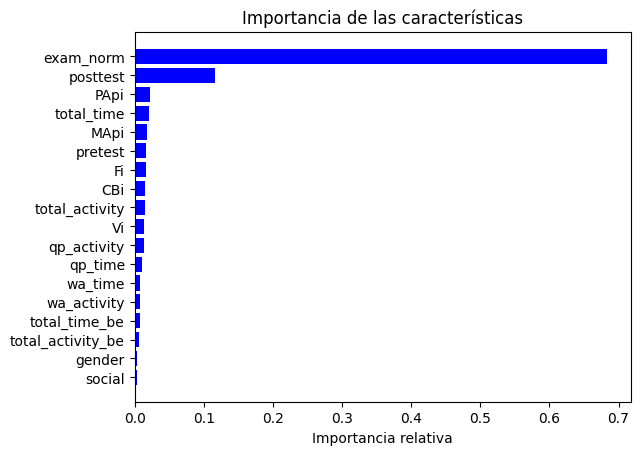

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Obtener la importancia de las características
importances = rf.feature_importances_
indices = np.argsort(importances)

# Crear una visualización de la importancia de las características
plt.figure()
plt.title("Importancia de las características")
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Importancia relativa")
plt.show()

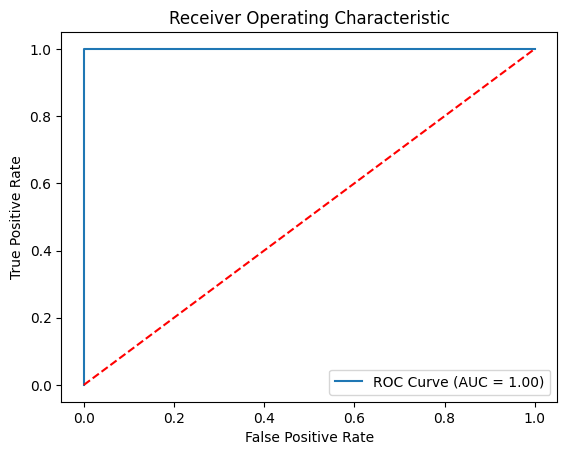

In [3]:
# Curva ROC y AUC
y_pred_proba = rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()